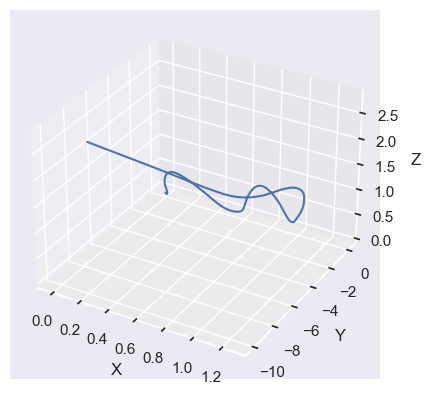

In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('datasets/activities/testing.csv')

df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df.set_index('Timestamp', inplace=True)
df = df.resample('0.01S').mean()

columns_to_predict_locus = ['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)', 'Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']
df = df[columns_to_predict_locus]

acceleration = df[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)']].values
gyroscope = df[['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']].values

df = df.dropna()

linear_acceleration = df[['Linear Acceleration x (m/s^2)', 'Linear Acceleration y (m/s^2)', 'Linear Acceleration z (m/s^2)']].values
gyroscope = df[['Gyroscope x (rad/s)', 'Gyroscope y (rad/s)', 'Gyroscope z (rad/s)']].values

velocity = np.zeros_like(linear_acceleration)
position = np.zeros_like(linear_acceleration)

# 积分计算速度和位移
for i in range(1, len(df)):
    dt = (df.index[i] - df.index[i-1]).total_seconds()
    velocity[i] = velocity[i-1] + linear_acceleration[i] * dt
    position[i] = position[i-1] + velocity[i] * dt

# 设置seaborn样式
sns.set()

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = position[:, 0]
y = position[:, 1]
z = position[:, 2]

# 绘制轨迹
ax.plot(x, y, z)

# 设置图形参数
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# 显示图形
plt.show()